<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 주택가격 데이터 불러오기
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
'python-machine-learning-book-2nd-edition'
'/master/code/ch10/housing.data.txt', header = None, sep = '\s+')

df.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
            'PRTATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


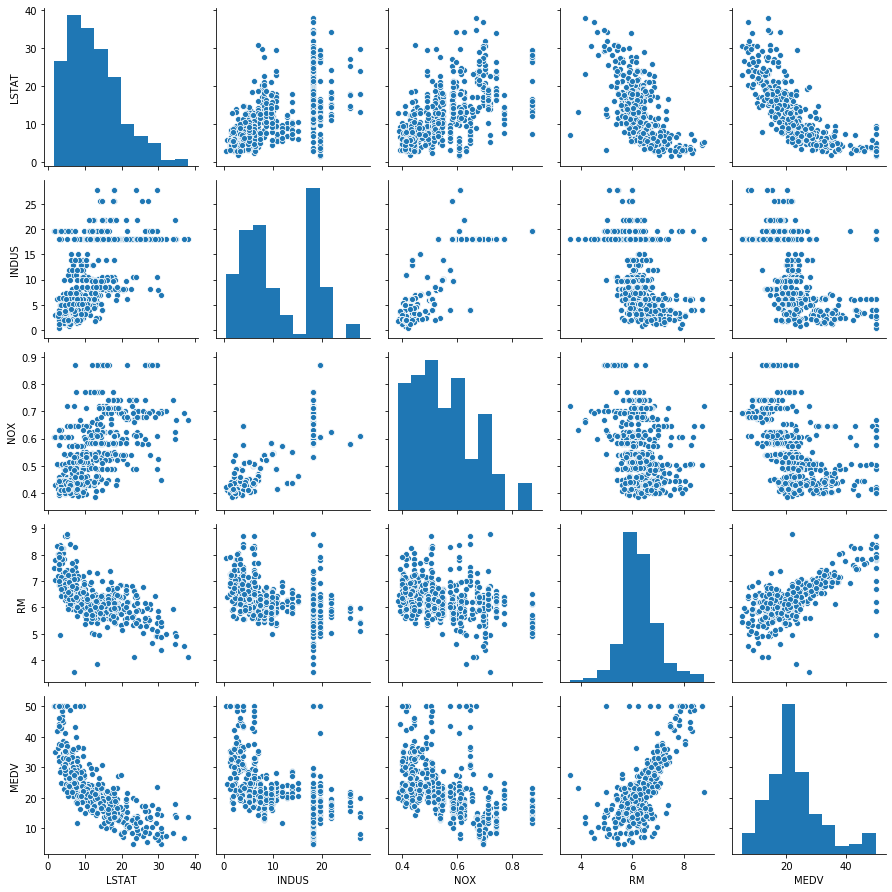

In [0]:
# 산점도 행렬
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height = 2.5)
plt.tight_layout()
plt.show()

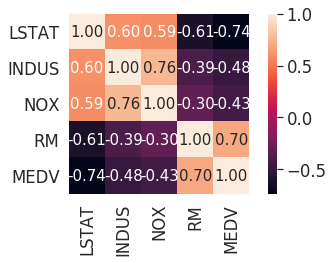

In [0]:
# heatmap을 이용한 상관관계행렬
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 15},
                 yticklabels = cols, xticklabels = cols)
plt.tight_layout()
plt.show()

In [0]:
# 최소제곱 선형회귀모델 구현

class LinearRegressionGD(object):
  def __init__(self, eta = 0.001, n_iter = 20):
    self.eta = eta
    self.n_iter = n_iter
  
  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errros)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors ** 2).sum()/2.0
      self.cost_.append(cost)

    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:] + self.w_[0])

  def predict(self, X):
    return self.net_input(X)

In [0]:
X = df[['RM']].values
y = df[['MEDV']].values

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

ValueError: ignored